In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
from numpy.fft import fft
from tqdm import tqdm
import pickle

without the U(1) phases, the swaps and iswaps returns to identity after 2*L timesteps, as expected

In [184]:
def fft_plot(signal, timeInterval, hann=True):
    """
    get freqs axis and power spectral density of signal, collected over timeInterval
    returns only 
    """
    nSamples = len(signal)
    dt = timeInterval/(nSamples)
    print('Nyquist freq: ', nSamples/timeInterval/2)
    spectrumLength = int(np.floor(nSamples/2))+1
    if hann:
        hann_window = np.hanning(nSamples)
        powerSpectralDensity = np.abs(fft(hann_window*(signal-np.mean(signal)))[:spectrumLength])**2
    else:
        powerSpectralDensity = np.abs(fft(signal)[:spectrumLength])**2
    freqs = np.arange(spectrumLength) / (dt*nSamples)
    return freqs, powerSpectralDensity

In [63]:
swap = np.matrix([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
iswap = np.matrix([[1,0,0,0],[0,0,1j,0],[0,1j,0,0],[0,0,0,1]])
swaps = [iswap, swap]
iphase = np.matrix([[1,0],[0,1j]])
identity = np.matrix([[1,0],[0,1]])
phases = [identity, iphase]
def phase(theta):
    return np.array([[1,0],[0,np.exp(1j*theta)]])

In [64]:
from routines_genclif import *

# from routines_aux import gf2RowRed
from routines_tab import gf2RowRed

def lst_gen(lst):
    for item in lst:
        yield item

In [65]:
characterise(iphase)

array([[1, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])

In [66]:
iswap_z2 = allGens()
C1(iswap_z2, 0, C1_names.index('-Y2'))
C1(iswap_z2, 1, C1_names.index('-X2'))
CZ(iswap_z2, 0, 1)
C1(iswap_z2, 0, C1_names.index('Y2'))
C1(iswap_z2, 1, C1_names.index('-X2'))
CZ(iswap_z2, 0, 1)
C1(iswap_z2, 0, C1_names.index('Y2'))
C1(iswap_z2, 1, C1_names.index('X2'))

swap_z2 = allGens()
C1(swap_z2, 1, C1_names.index('-Y2'))
CZ(swap_z2, 0, 1)
C1(swap_z2, 0, C1_names.index('-Y2'))
C1(swap_z2, 1, C1_names.index('Y2'))
CZ(swap_z2, 0, 1)
C1(swap_z2, 0, C1_names.index('Y2'))
C1(swap_z2, 1, C1_names.index('-Y2'))
CZ(swap_z2, 0, 1)
C1(swap_z2, 1, C1_names.index('Y2'))

swaps_z2 = [iswap_z2, swap_z2]

In [15]:
# check this z2 representation

# swap

print(np.array_equal(swap @ np.kron(identity, pauliz) @ swap.H, np.kron(pauliz, identity))) # 0001
print(np.array_equal(swap @ np.kron(pauliz, pauliz) @ swap.H, np.kron(pauliz, pauliz))) # 0011
print(np.array_equal(swap @ np.kron(identity, paulix) @ swap.H, np.kron(paulix, identity))) # 0100
print(np.array_equal(swap @ np.kron(paulix, identity) @ swap.H, np.kron(identity, paulix))) # 1000

# iswap

print(np.array_equal(iswap @ np.kron(identity, pauliz) @ iswap.H, np.kron(pauliz, identity))) # 0001
print(np.array_equal(iswap @ np.kron(pauliz, pauliz) @ iswap.H, np.kron(pauliz, pauliz))) # 0011
print(np.array_equal(iswap @ np.kron(pauliy, paulix) @ iswap.H, np.kron(paulix, pauliy))) # 1110
print(np.array_equal(iswap @ np.kron(pauliy, pauliy) @ iswap.H, np.kron(pauliy, pauliy)))

True
True
True
True
True
True
True
True


In [67]:
def twoQubitClif(tab, gate, a, b):
    """
    PHASELESS gate evolution
    this varies from the usual twoQubitClif for tableaus, here each COLUMN is a stabiliser (Pauli string)
    """
    n = np.shape(tab)[1] // 2
    matches = tab[n+b,:] + 2*tab[n+a,:] + 4*tab[b,:] + 8*tab[a,:]
    tab[a,:] = gate[matches,0] # xa
    tab[b,:] = gate[matches,1] # xb
    tab[n+a,:] = gate[matches,2] # za
    tab[n+b,:] = gate[matches,3] # zb
    
def twoQubitClif_ps(ps, gate, a, b):
    """
    PHASEFUL gate evolution
    acts on 1D array pauli string ps, where the last position indexes the phsae 
    """
    L = len(ps) // 2
    match = ps[L+b] + 2*ps[L+a] + 4*ps[b] + 8*ps[a]
    ps[a] = gate[match,0] # xa
    ps[b] = gate[match,1] # xb
    ps[L+a] = gate[match,2] # za
    ps[L+b] = gate[match,3] # zb
    ps[2*L] = (ps[2*L] + gate[match,4]) % 2 # phase
    

def p_gate(tab, a):
    """
    PHASELESS phase gate
    """
    n = np.shape(tab)[1] // 2
    xa = a
    za = n+a
    tab[za,:] = (tab[za,:] + tab[xa,:]) % 2
    
def p_gate_ps(ps, a):
    """
    PHASEFUL phase gate
    """
    L = len(ps) // 2
    xa = a
    za = L+a
    r = 2*L
    ps[r] = (ps[r] + (ps[xa] * ps[za])) % 2
    ps[za] = (ps[za] + ps[xa]) % 2

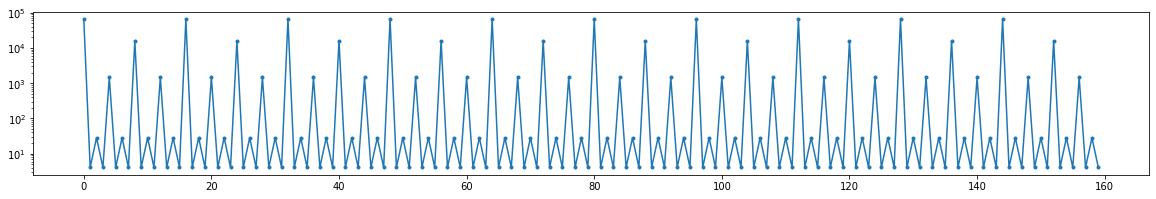

In [10]:
# phase restricted to identity and i phase gate

infile = open('temp4_charge/L8_evol20', 'rb')
sff_brute = pickle.load(infile)
infile.close()

plt.figure(figsize=(20,3))
plt.semilogy(np.mean(sff_brute, axis=0), '.-')

In [68]:
# Z2 short
# floquet!

def exp_sff(L, reps, max_t, directory, name_ext):
    circuits = np.random.choice([0,1],(L,reps)) # let 0 be iswap, 1 be swap
    circuits_phase = np.random.choice([0,1],(2*L,reps)) # let 0 be identity, 1 be phase gate
    
    n_evecs_t = np.zeros((max_t,reps))
    allphase1 = np.full((max_t,reps), True)
    
    for circuit_ind in tqdm(range(reps)):
        floquet_array = circuits[:,circuit_ind]
        floquet_array_phase = circuits_phase[:,circuit_ind]
        
        for timesteps in range(max_t):
            
            pauli_strings = np.identity(2*L, dtype='int8')
        
            for t in range(timesteps):
                floquet = lst_gen(floquet_array)
                floquet_phase = lst_gen(floquet_array_phase)
                for i in range(0, L ,2):
                    gate = swaps_z2[next(floquet)]
                    twoQubitClif(pauli_strings, gate, i, i+1)
                for i in range(L):
                    if next(floquet_phase): p_gate(pauli_strings, i)
                for i in range(1, L+1, 2):
                    gate = swaps_z2[next(floquet)]
                    twoQubitClif(pauli_strings, gate, i, (i+1)%L)
                for i in range(L):
                    if next(floquet_phase): p_gate(pauli_strings, i)

            gate = pauli_strings

            eig1 = (gate - np.eye(2*L, dtype='int8')) % 2
            system = np.vstack((eig1, np.identity(2*L, dtype='int8')))
            system_solved = gf2RowRed(system.T.copy()).T
            

            n_evecs = 0
            eigvecs = []
            for col in range(2*L):
                if np.sum(system_solved[:2*L,col]) == 0:
                    n_evecs += 1
                    eigvec = system_solved[2*L:,col]
                    eigvecs.append(eigvec)
                    if not np.array_equal((gate @ eigvec) % 2, eigvec):
                        print(col, eigvec, (gate @ eigvec) % 2)
                        raise Exception()
            n_evecs_t[timesteps,circuit_ind] = n_evecs

            for eigvec in eigvecs:
                ps = np.hstack((eigvec, [0]))

                for t in range(timesteps):
                    floquet = lst_gen(floquet_array)
                    floquet_phase = lst_gen(floquet_array_phase)
                    for i in range(0, L ,2):
                        gate = swaps_z2[next(floquet)]
                        twoQubitClif_ps(ps, gate, i, i+1)
                    for i in range(L):
                        if next(floquet_phase): p_gate_ps(ps, i)
                    for i in range(1, L+1, 2):
                        gate = swaps_z2[next(floquet)]
                        twoQubitClif_ps(ps, gate, i, (i+1)%L)
                    for i in range(L):
                        if next(floquet_phase): p_gate_ps(ps, i)

                if (ps[-1] != 0):
                    allphase1[timesteps,circuit_ind] = False
                    break
    return n_evecs_t, allphase1
#     outfile = open(directory + '/L' + str(L) + '_evol' + str(max_t//L) + '_' + name_ext, 'wb')
#     pickle.dump(np.stack((n_evecs_t, allphase1)), outfile)
#     outfile.close()

In [187]:
L = 12
reps = 10
max_t = 4*L
n_evecs_t, allphase1 = exp_sff(L, reps=reps, max_t=max_t, directory=None, name_ext=None)



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:00<00:08,  1.01it/s]

 20%|██        | 2/10 [00:02<00:08,  1.04s/it]

 30%|███       | 3/10 [00:02<00:06,  1.02it/s]

 40%|████      | 4/10 [00:04<00:06,  1.01s/it]

 50%|█████     | 5/10 [00:05<00:05,  1.04s/it]

 60%|██████    | 6/10 [00:06<00:04,  1.10s/it]

 70%|███████   | 7/10 [00:07<00:03,  1.09s/it]

 80%|████████  | 8/10 [00:08<00:02,  1.03s/it]

 90%|█████████ | 9/10 [00:09<00:01,  1.00s/it]

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


In [113]:
sff_brute = np.stack((n_evecs_t, allphase1))

In [188]:
infile = open('sff_charge/L12_evol4_local', 'wb')
pickle.dump(np.stack((n_evecs_t, allphase1)), infile)
infile.close()

In [198]:
L = 36
max_t = 4

infile = open('sff_charge/L' + str(L) + '_evol' + str(max_t) + '_local', 'rb')
sff_brute = pickle.load(infile)
infile.close()

Nyquist freq:  0.5


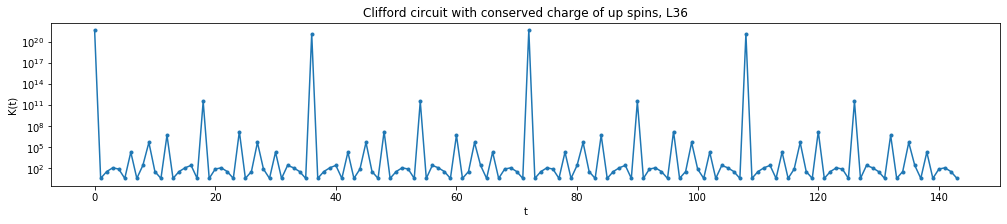

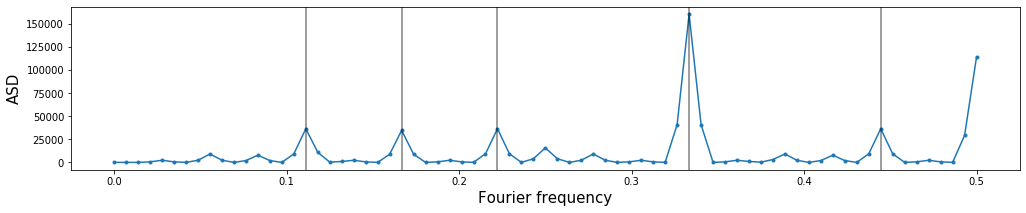

In [201]:
plt.figure(figsize=(17,3))
plt.semilogy(np.mean(2**sff_brute[0,:] * sff_brute[1,:],axis=1), '.-')
plt.title('Clifford circuit with conserved charge of up spins, L' + str(L));
plt.xlabel('t')
plt.ylabel('K(t)')

freqs, psd = fft_plot(np.log2(np.mean(2**sff_brute[0,:] * sff_brute[1,:], axis=1)), len(np.mean(sff_brute[0,:],axis=1)))
plt.figure(figsize=(17,3))
plt.plot(freqs, psd, '.-')
plt.xlabel('Fourier frequency', fontsize=15)
plt.ylabel('ASD', fontsize=15)

# peaks = [1/2,1/4,1/8,3/8]
# peaks = [1/3,1/4,1/6,1/12,5/12]
peaks = [1/3,1/6,1/9,2/9,4/9]
for peak in peaks:
    plt.axvline(x=peak, color='k', alpha=0.5)

5.38e+03
12.393658591454773
6.45e+12
42.55280183555718
8.53e+19
66.20858662196646


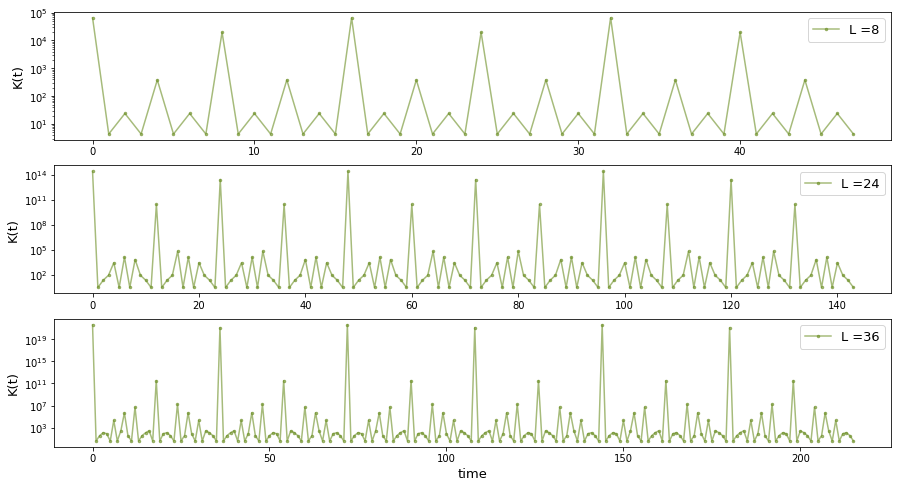

In [207]:
plt.figure(figsize=(15,8))
Ls = [8,24,36]
for i in range(len(Ls)):
    L = Ls[i]
    infile = open('sff_charge/L' + str(L) + '_evol' + str(max_t) + '_local', 'rb')
    sff_brute = pickle.load(infile)
    infile.close()
    
    sff_brute = np.hstack((sff_brute, sff_brute[:,:sff_brute.shape[1]//2,:]))
    
    plt.subplot(3,1,i+1)
    plt.semilogy(np.mean(2**sff_brute[0,:] * sff_brute[1,:],axis=1), '.-', color='olivedrab', alpha=0.6, markersize=5)
    plt.legend(['L =' + str(L)], fontsize=13)
    #plt.title('L =' + str(L), fontsize=13);
    if i==2: plt.xlabel('time', fontsize=13)
    plt.ylabel('K(t)', fontsize=13)

    print('{:.2e}'.format(np.mean(2**sff_brute[0,:] * sff_brute[1,:])))
    print(np.log2(np.mean(2**sff_brute[0,:] * sff_brute[1,:])))

# plt.savefig('fig_concharge.pdf')

In [42]:
# verified equivalence

L = 8
reps = 20
max_t = 3*L

circuits = np.random.choice([0,1],(L,reps)) # let 0 be iswap, 1 be swap
circuits_phase = np.random.choice([0,1],(2*L,reps)) # let 0 be identity, 1 be phase gate

sff_brute = np.empty((max_t,reps), dtype='float') 
n_evecs_t = np.zeros((max_t,reps))
allphase1 = np.full((max_t,reps), True)

permute = np.zeros((2**L,2**L),dtype='int8')
for i in range(len(permute)-1): permute[2*i%(2**L-1),i] = 1
permute[2**L-1,2**L-1] = 1

for circuit_ind in tqdm(range(reps)):
    floquet_array = circuits[:,circuit_ind]
    floquet_array_phase = circuits_phase[:,circuit_ind]

#     floquet_array = np.array([1, 0, 1, 0, 0, 0, 0, 0])
#     floquet_array_phase = np.zeros(2*L,dtype='int8')
#     floquet_array_phase = np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0])      
#     print(floquet_array)
#     print(floquet_array_phase)

#----------------------------------
    U1 = swaps[floquet_array[0]]
    for ind in range(1,len(floquet_array)//2):
        U1 = np.kron(U1, swaps[floquet_array[ind]])

    P1 = phases[floquet_array_phase[0]]
    for ind in range(1,len(floquet_array_phase)//2):
        P1 = np.kron(P1, phases[floquet_array_phase[ind]])
    
    U1 = P1 @ U1
    
    U2 = swaps[floquet_array[len(floquet_array)//2]]
    for ind in range(len(floquet_array)//2+1,len(floquet_array)):
        U2 = np.kron(U2, swaps[floquet_array[ind]])
    
    U2 = permute.T @ U2 @ permute
    
    P2 = phases[floquet_array_phase[len(floquet_array_phase)//2]]
    for ind in range(len(floquet_array_phase)//2+1,len(floquet_array_phase)):
        P2 = np.kron(P2, phases[floquet_array_phase[ind]])
    
    U2 = P2 @ U2

    U = U2 @ U1
    
#----------------------------------

    for timesteps in range(max_t):
        
        Ut = np.linalg.matrix_power(U, timesteps)
        sff_brute[timesteps,circuit_ind] = np.real(np.round(np.trace(Ut.H) * np.trace(Ut),3))

        pauli_strings = np.identity(2*L, dtype='int8')

        for t in range(timesteps):
            floquet = lst_gen(floquet_array)
            floquet_phase = lst_gen(floquet_array_phase)
            for i in range(0, L ,2):
                gate = swaps_z2[next(floquet)]
                twoQubitClif(pauli_strings, gate, i, i+1)
            for i in range(L):
                if next(floquet_phase): p_gate(pauli_strings, i)
            for i in range(1, L+1, 2):
                gate = swaps_z2[next(floquet)]
                twoQubitClif(pauli_strings, gate, i, (i+1)%L)
            for i in range(L):
                if next(floquet_phase): p_gate(pauli_strings, i)

        gate = pauli_strings

        eig1 = (gate - np.eye(2*L, dtype='int8')) % 2
        system = np.vstack((eig1, np.identity(2*L, dtype='int8')))
        system_solved = gf2RowRed(system.T.copy()).T


        n_evecs = 0
        eigvecs = []
        for col in range(2*L):
            if np.sum(system_solved[:2*L,col]) == 0:
                n_evecs += 1
                eigvec = system_solved[2*L:,col]
                eigvecs.append(eigvec)
                if not np.array_equal((gate @ eigvec) % 2, eigvec):
                    print(col, eigvec, (gate @ eigvec) % 2)
                    raise Exception()
        n_evecs_t[timesteps,circuit_ind] = n_evecs

        for eigvec in eigvecs:
            ps = np.hstack((eigvec, [0]))

            for t in range(timesteps):
                floquet = lst_gen(floquet_array)
                floquet_phase = lst_gen(floquet_array_phase)
                for i in range(0, L ,2):
                    gate = swaps_z2[next(floquet)]
                    twoQubitClif_ps(ps, gate, i, i+1)
                for i in range(L):
                    if next(floquet_phase): p_gate_ps(ps, i)
                for i in range(1, L+1, 2):
                    gate = swaps_z2[next(floquet)]
                    twoQubitClif_ps(ps, gate, i, (i+1)%L)
                for i in range(L):
                    if next(floquet_phase): p_gate_ps(ps, i)

            if (ps[-1] != 0):
                allphase1[timesteps,circuit_ind] = False
                break

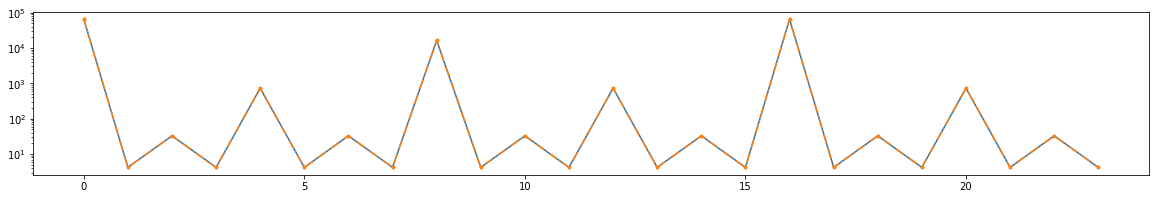

In [43]:
plt.figure(figsize=(20,3))
plt.semilogy(np.mean(sff_brute,axis=1))
plt.semilogy(np.mean(2**n_evecs_t * allphase1,axis=1), '.-.')

In [36]:
# unitary brute force

L = 4
reps = 1
max_t = 4*L

sff_brute = np.empty((max_t, reps), dtype='float') 

permute = np.zeros((2**L,2**L),dtype='int8')
for i in range(len(permute)-1): permute[2*i%(2**L-1),i] = 1
permute[2**L-1,2**L-1] = 1

for rep in tqdm(range(reps)):
    floquet_array = np.random.choice([0,1],L)
    floquet_array_phase = np.random.choice([0,1],2*L)

    U1 = swaps[floquet_array[0]]
    for ind in range(1,len(floquet_array)//2):
        U1 = np.kron(U1, swaps[floquet_array[ind]])

    P1 = phases[floquet_array_phase[0]]
    for ind in range(1,len(floquet_array_phase)//2):
        P1 = np.kron(P1, phases[floquet_array_phase[ind]])
    
    U1 = P1 @ U1
    
    U2 = swaps[floquet_array[len(floquet_array)//2]]
    for ind in range(len(floquet_array)//2+1,len(floquet_array)):
        U2 = np.kron(U2, swaps[floquet_array[ind]])
    
    U2 = permute.T @ U2 @ permute
    
    P2 = phases[floquet_array_phase[len(floquet_array_phase)//2]]
    for ind in range(len(floquet_array_phase)//2+1,len(floquet_array_phase)):
        P2 = np.kron(P2, phases[floquet_array_phase[ind]])
    
    U2 = P2 @ U2

    U = U2 @ U1
    
    for timesteps in range(max_t):
        Ut = np.linalg.matrix_power(U, timesteps)
        sff_brute[timesteps,reps] = np.real(np.round(np.trace(Ut.H) * np.trace(Ut),3))

In [11]:
np.log2(sff_brute)

/Users/Shiye/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


array([[  8.,   3.,   6.,   3., -inf,   3.,   6.,   3.,   8.,   3.,   6.,
          3., -inf,   3.,   6.,   3.]])

[256.   8.  64.   8.   0.   8.  64.   8. 256.   8.  64.   8.   0.   8.
  64.   8.]


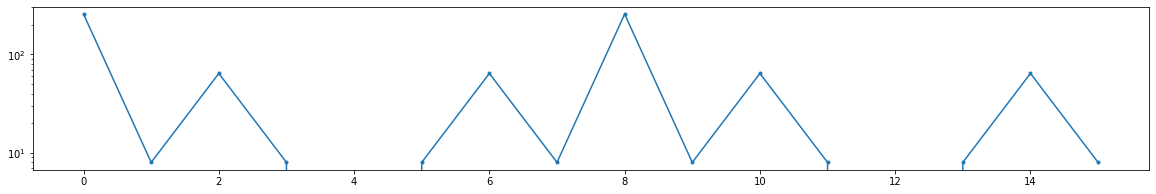

In [12]:
plt.figure(figsize=(20,3))
plt.semilogy(np.mean(sff_brute,axis=0), '.-')
print(np.mean(sff_brute,axis=0))

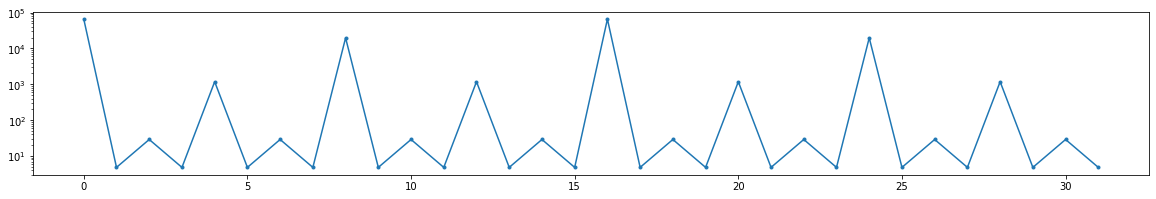

In [57]:
plt.figure(figsize=(20,3))
plt.semilogy(np.mean(sff_brute,axis=0), '.-')

[0 0 1 1 0 1 1 1 0 0]
[0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0]
[[1.048576e+06 4.000000e+00 0.000000e+00 4.000000e+00 1.600000e+01
  1.024000e+03 0.000000e+00 4.000000e+00 1.600000e+01 4.000000e+00]]


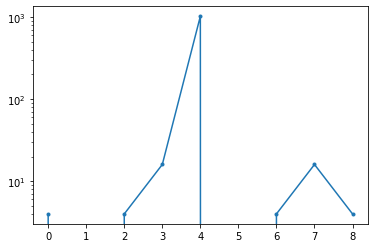

In [164]:
plt.semilogy(np.mean(sff_brute,axis=0)[1:], '.-')
print(floquet_array)
print(phases_array)
print(sff_brute)

[1 0 1 0 0 0 0 1 0 0]
[1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1]
[[1.048576e+06 4.000000e+00 0.000000e+00 4.000000e+00 1.600000e+01
  1.024000e+03 0.000000e+00 4.000000e+00 1.600000e+01 4.000000e+00]]


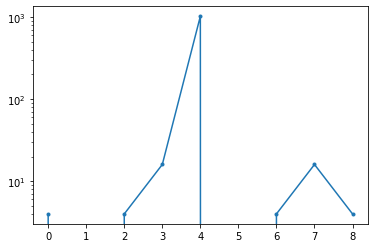

In [162]:
plt.semilogy(np.mean(sff_brute,axis=0)[1:], '.-')
print(floquet_array)
print(phases_array)
print(sff_brute)

[[1.048576e+06 4.000000e+00 0.000000e+00 4.000000e+00 1.600000e+01
  1.024000e+03 0.000000e+00 4.000000e+00 1.600000e+01 4.000000e+00]]


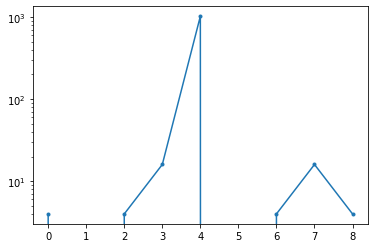

In [156]:
plt.semilogy(np.mean(sff_brute,axis=0)[1:], '.-')
print(sff_brute)

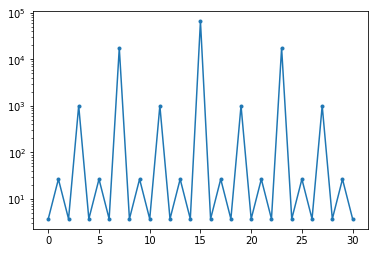

In [148]:
plt.semilogy(np.mean(sff_brute,axis=0)[1:], '.-')

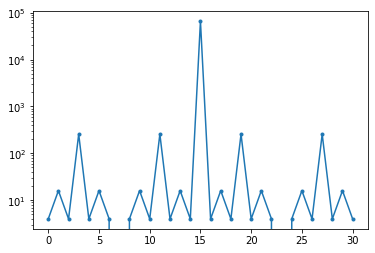

In [149]:
plt.semilogy(sff_brute[5,1:], '.-')

In [6]:
infile = open('temp4/L8_evol10', 'rb')
sff = pickle.load(infile)
infile.close()

(20, 80)


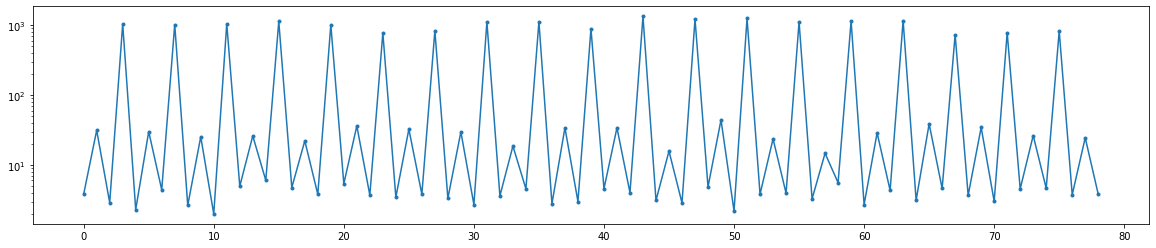

In [7]:
plt.figure(figsize=(20,4))
plt.semilogy(np.mean(sff,axis=0)[1:], '.-')
print(sff.shape)

In [56]:
infile = open('temp4/L8_evol20', 'rb')
sff = pickle.load(infile)
infile.close()

(5000, 160)


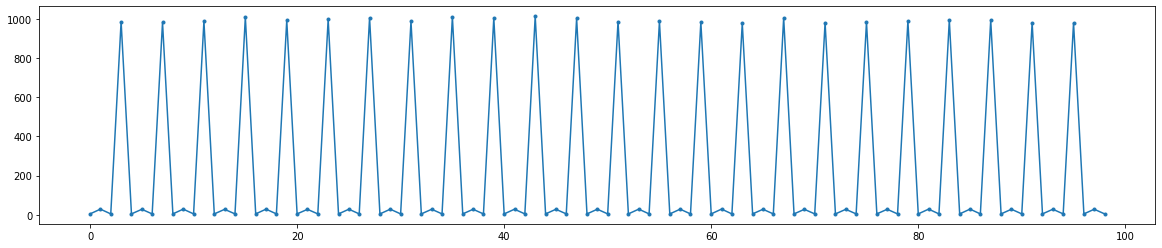

In [58]:
plt.figure(figsize=(20,4))
plt.semilogy(np.mean(sff,axis=0)[1:100], '.-')
print(sff.shape)

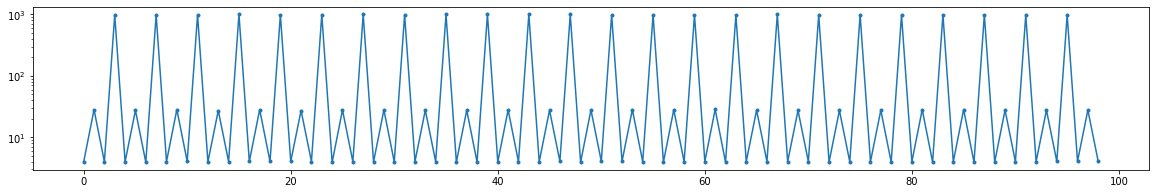

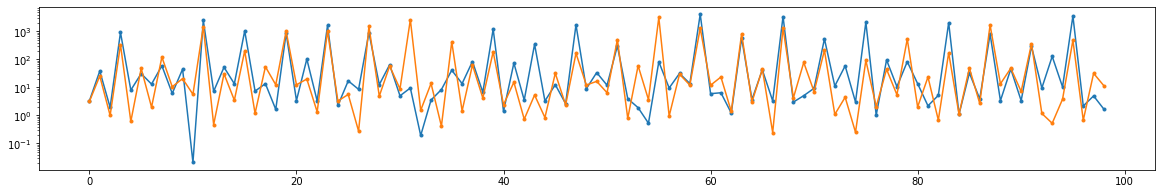

In [38]:
plt.figure(figsize=(20,3))
plt.semilogy(np.mean(sff[:],axis=0)[1:100], '.-')

# single trajectories
plt.figure(figsize=(20,3))
plt.semilogy(np.mean(sff[0:1],axis=0)[1:100], '.-')
plt.semilogy(np.mean(sff[1:2],axis=0)[1:100], '.-')

Nyquist freq:  0.5


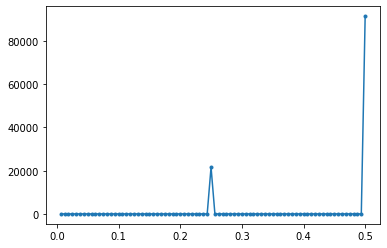

In [49]:
freqs, psd = fft_plot(np.log(np.mean(sff, axis=0)), sff.shape[1])
plt.plot(freqs[1:], psd[1:], '.-')

# not needed

Nyquist freq:  50.0


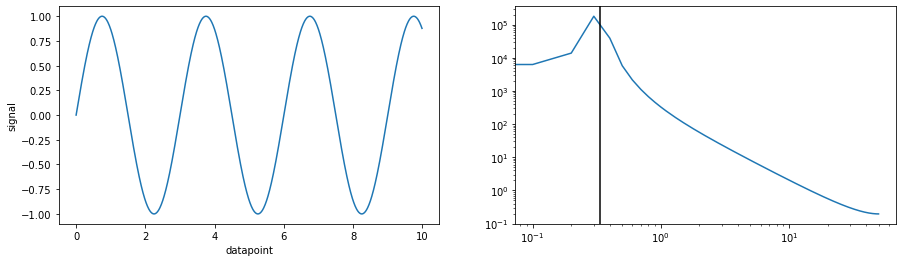

In [51]:
# example fft_plot use

# generating signal
nSamples = 1000
timeInterval = 10
dt = timeInterval/nSamples
f1 = 0.3333
t = np.arange(nSamples)
signal = np.sin(2 * np.pi * f1 * t * dt)

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(t / nSamples * timeInterval, signal)
plt.xlabel('datapoint')
plt.ylabel('signal')

# get F.T.
freqs, powerSpectralDensity = fft_plot(signal, 10)
plt.subplot(1,2,2)
plt.loglog(freqs, powerSpectralDensity)
plt.axvline(x=f1, color='k')

plt.show()

In [69]:
# unphysical, multiply all by diagonal phase matrix

L = 2
reps = 1
max_t = 10

sff_brute = np.empty((reps, max_t), dtype='float') 

for rep in tqdm(range(reps)):
    floquet_array= np.random.choice([0,1],L)
    phases = np.diag(np.exp(1j*np.random.uniform(low=0, high=2*np.pi, size=2**L)))

    U1 = swaps[floquet_array[0]]
    for ind in range(1,len(floquet_array)//2):
        U1 = np.kron(U1, swaps[floquet_array[ind]])

    U2 = swaps[floquet_array[len(floquet_array)//2]]
    for ind in range(len(floquet_array)//2+1,len(floquet_array)):
        U2 = np.kron(U2, swaps[floquet_array[ind]])

    U2 = phases @ U2

    permute = np.zeros((2**L,2**L),dtype='int8')
    for i in range(len(permute)-1): permute[2*i%(2**L-1),i] = 1
    permute[2**L-1,2**L-1] = 1

    U2 = permute.T @ U2 @ permute

    U = U2 @ U1
    
    for timesteps in range(max_t):
        Ut = np.linalg.matrix_power(U, timesteps)
        Ut = np.matrix(Ut)

        sff_brute[rep,timesteps] = np.real(np.round(np.trace(Ut.H) * np.trace(Ut),3))

In [ ]:
# phase gate of arbitrary U(1) phase on 1 at each site

L = 8
reps = 25
max_t = 4*L

sff_brute = np.empty((reps, max_t), dtype='float') 

for rep in tqdm(range(reps)):
    floquet_array = np.random.choice([0,1],L)
    phases_array = np.random.uniform(low=0, high=2*np.pi, size=2*L)

    U1 = swaps[floquet_array[0]]
    for ind in range(1,len(floquet_array)//2):
        U1 = np.kron(U1, swaps[floquet_array[ind]])

    P1 = phase(phases_array[0])
    for ind in range(1,len(phases_array)//2):
        P1 = np.kron(P1, phase(phases_array[ind]))
    
    U1 = P1 @ U1
    
    U2 = swaps[floquet_array[len(floquet_array)//2]]
    for ind in range(len(floquet_array)//2+1,len(floquet_array)):
        U2 = np.kron(U2, swaps[floquet_array[ind]])
    
    P2 = phase(phases_array[len(phases_array)//2])
    for ind in range(len(phases_array)//2+1,len(phases_array)):
        P2 = np.kron(P2, phase(phases_array[ind]))
    
    U2 = P2 @ U2

    permute = np.zeros((2**L,2**L),dtype='int8')
    for i in range(len(permute)-1): permute[2*i%(2**L-1),i] = 1
    permute[2**L-1,2**L-1] = 1

    U2 = permute.T @ U2 @ permute

    U = U2 @ U1
    
    for timesteps in range(max_t):
        Ut = np.linalg.matrix_power(U, timesteps)
        Ut = np.matrix(Ut)

        sff_brute[rep,timesteps] = np.real(np.round(np.trace(Ut.H) * np.trace(Ut),3))